<a href="https://colab.research.google.com/github/alonsosilvaallende/COVID-19/blob/master/COVID_19_Testing_Chile_vs_Several.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

In [0]:
TIPPING_POINT = 100

# Get the date for each country at which the tipping point was reached.

In [0]:
full_data = pd.read_csv("https://covid.ourworldindata.org/data/ecdc/full_data.csv", index_col='date')

In [0]:
Chile = full_data.query("location == 'Chile'")
South_Korea = full_data.query("location == 'South Korea'")
United_States = full_data.query("location == 'United States'")

In [0]:
date_since_TP_CL = Chile["total_cases"][Chile["total_cases"]>=TIPPING_POINT].keys()[0]
date_since_TP_SK = South_Korea["total_cases"][South_Korea["total_cases"]>=TIPPING_POINT].keys()[0]
date_since_TP_US = United_States["total_cases"][United_States["total_cases"]>=TIPPING_POINT].keys()[0]

In [6]:
date_since_TP_CL, date_since_TP_SK, date_since_TP_US

('2020-03-17', '2020-02-21', '2020-03-03')

# Get the total number of tests per million people of South Korea and the United States

Download the file from Our World in Data ( https://ourworldindata.org/grapher/cumulative-total-tests-per-million ) and add it to your Google Drive.

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
tests_raw = pd.read_csv("gdrive/My Drive/cumulative-total-tests-per-million.csv")

In [9]:
tests_raw.head(3)

,Entity,Code,Date,Cumulative total tests per million
0,South Korea - cases tested,NaN,"Jan 21, 2020",0.23
1,South Korea - cases tested,NaN,"Jan 22, 2020",0.33
2,South Korea - cases tested,NaN,"Jan 23, 2020",0.00


In [10]:
tests_raw['Entity'].unique()

array(['South Korea - cases tested',
       'United States (COVID Tracking Project)',
       'United States - Specimens tested (CDC)'], dtype=object)

In [0]:
SK_tests_raw = tests_raw.query("Entity == 'South Korea - cases tested'")
US_tests_raw = tests_raw.query("Entity == 'United States (COVID Tracking Project)'")

In [0]:
data_starting_date_SK = SK_tests_raw['Date'].iloc[0]
data_starting_date_US = US_tests_raw['Date'].iloc[0]

In [0]:
delta_time_SK = pd.to_datetime(date_since_TP_SK) - pd.to_datetime(data_starting_date_SK)
delta_time_US = pd.to_datetime(date_since_TP_US) - pd.to_datetime(data_starting_date_US)

In [0]:
SK_total_tests_raw = SK_tests_raw['Cumulative total tests per million']
US_total_tests_raw = US_tests_raw['Cumulative total tests per million']

In [0]:
US_total_tests = {}
if delta_time_US.days<0:
  for i in np.arange(0,np.abs(delta_time_US.days),1):
    US_total_tests[i] = 0.0
  for i in np.arange(np.abs(delta_time_US.days), len(US_total_tests_raw)+np.abs(delta_time_US.days), 1):
    US_total_tests[i] = US_total_tests_raw.iloc[i-np.abs(delta_time_US.days)]
else:
  US_total_tests = US_total_tests_raw.iloc[delta_time_US.days:].reset_index(drop=True)
US_total_tests = pd.Series(US_total_tests)

In [0]:
SK_total_tests = {}
if delta_time_SK.days<0:
  for i in np.arange(0,np.abs(delta_time_SK.days),1):
    SK_total_tests[i] = 0.0
  for i in np.arange(np.abs(delta_time_SK.days), len(SK_total_tests_raw)+np.abs(delta_time_SK.days), 1):
    SK_total_tests[i] = SK_total_tests_raw.iloc[i-np.abs(delta_time_SK.days)]
else:
  SK_total_tests = SK_total_tests_raw.iloc[delta_time_SK.days:].reset_index(drop=True)
SK_total_tests = pd.Series(SK_total_tests)

# Add the total number of tests per million people from Chile

In [0]:
Chile_dict = {
    '2020-03-27': 23105,
    '2020-03-29': 28416,
    '2020-03-30': 32096,
    '2020-03-31': 35142
}

In [0]:
Chile_tests_raw = pd.Series(Chile_dict)

In [19]:
Chile_tests_raw

2020-03-27    23105
2020-03-29    28416
2020-03-30    32096
2020-03-31    35142
dtype: int64

In [0]:
Chile_total_tests = {}
for i in np.arange(len(Chile_tests_raw)):
  gap = (pd.to_datetime(Chile_tests_raw.keys()[i]) - pd.to_datetime(date_since_TP_CL)).days
  Chile_total_tests[gap] = Chile_tests_raw.iloc[i]
Chile_total_tests = pd.Series(Chile_total_tests)

In [21]:
Chile_total_tests

10    23105
12    28416
13    32096
14    35142
dtype: int64

In [0]:
Chile_population = 19

In [0]:
Chile_total_tests = Chile_total_tests/Chile_population

# Make the plot

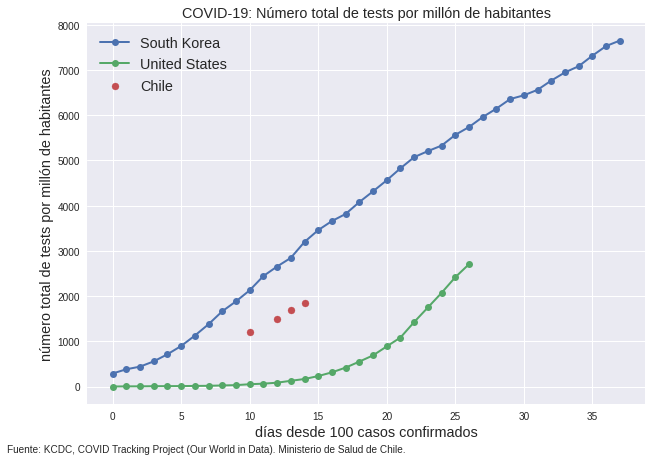

In [24]:
fig, ax = plt.subplots(figsize=(10,7))
plt.plot(SK_total_tests, linewidth=2, marker='o', label='South Korea')
plt.plot(US_total_tests, linewidth=2, marker='o', label='United States')
plt.scatter(Chile_total_tests.keys(), Chile_total_tests, color='C2', label='Chile')
plt.annotate('Fuente: KCDC, COVID Tracking Project (Our World in Data). Ministerio de Salud de Chile.', (0,0), (-80,-40), fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')
plt.legend(fontsize='x-large')
plt.title('COVID-19: Número total de tests por millón de habitantes', fontsize='x-large')
plt.ylabel('número total de tests por millón de habitantes', fontsize='x-large')
plt.xlabel('días desde 100 casos confirmados', fontsize='x-large')
plt.savefig("Chile_SK_US.png", format='png', dvi=500)